In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn; seaborn.set()
from cesium import datasets

# Returns
#     dict
#         Dictionary with attributes:
#             - times: list of (4096,) arrays of time values
#             - measurements: list of (4096,) arrays of measurement values
#             - classes: array of class labels for each time series
#             - archive: path to data archive
#             - header: path to header file

eeg = datasets.fetch_andrzejak()

print(eeg)

Loaded data from cached archive.


{'times': [array([0.00000000e+00, 5.76171875e-03, 1.15234375e-02, ...,
       2.35884766e+01, 2.35942383e+01, 2.36000000e+01]), array([0.00000000e+00, 5.76171875e-03, 1.15234375e-02, ...,
       2.35884766e+01, 2.35942383e+01, 2.36000000e+01]), array([0.00000000e+00, 5.76171875e-03, 1.15234375e-02, ...,
       2.35884766e+01, 2.35942383e+01, 2.36000000e+01]), array([0.00000000e+00, 5.76171875e-03, 1.15234375e-02, ...,
       2.35884766e+01, 2.35942383e+01, 2.36000000e+01]), array([0.00000000e+00, 5.76171875e-03, 1.15234375e-02, ...,
       2.35884766e+01, 2.35942383e+01, 2.36000000e+01]), array([0.00000000e+00, 5.76171875e-03, 1.15234375e-02, ...,
       2.35884766e+01, 2.35942383e+01, 2.36000000e+01]), array([0.00000000e+00, 5.76171875e-03, 1.15234375e-02, ...,
       2.35884766e+01, 2.35942383e+01, 2.36000000e+01]), array([0.00000000e+00, 5.76171875e-03, 1.15234375e-02, ...,
       2.35884766e+01, 2.35942383e+01, 2.36000000e+01]), array([0.00000000e+00, 5.76171875e-03, 1.15234375e-02

['Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Norm

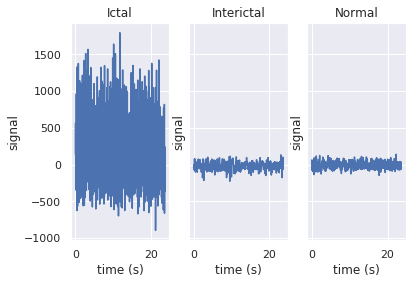

In [2]:
# Group together classes (Z, O), (N, F), (S) as normal, interictal, ictal
eeg["classes"] = eeg["classes"].astype("U16") #  allocate memory for longer class names

eeg["classes"][np.logical_or(eeg["classes"]=="Z", eeg["classes"]=="O")] = "Normal"
eeg["classes"][np.logical_or(eeg["classes"]=="N", eeg["classes"]=="F")] = "Interictal"
eeg["classes"][eeg["classes"]=="S"] = "Ictal"

print(eeg["classes"])

fig, ax = plt.subplots(1, len(np.unique(eeg["classes"])), sharey=True)
for label, subplot in zip(np.unique(eeg["classes"]), ax):
    i = np.where(eeg["classes"] == label)[0][0]
    subplot.plot(eeg["times"][i], eeg["measurements"][i])
    subplot.set(xlabel="time (s)", ylabel="signal", title=label)

In [3]:
import warnings
warnings.filterwarnings('ignore')

from cesium import featurize
features_to_use = ["mean",
                   "median",
                   "amplitude",
                   "maximum",
                   "minimum",
                   "std",
                   "skew"]
                   
fset_cesium = featurize.featurize_time_series(times=eeg["times"],
                                              values=eeg["measurements"],
                                              errors=None,
                                              features_to_use=features_to_use)
print(fset_cesium.head())

feature       mean median amplitude maximum minimum        std      skew
channel          0      0         0       0       0          0         0
0        -4.132048   -4.0     143.5   141.0  -146.0  40.411000  0.032805
1       -52.444716  -51.0     211.5   169.0  -254.0  48.812668 -0.092715
2        12.705150   13.0     165.0   184.0  -146.0  47.144789 -0.004100
3        -3.992433   -4.0     171.5   162.0  -181.0  47.072316  0.063678
4       -17.999268  -18.0     170.0   152.0  -188.0  44.910958  0.142753


In [4]:
import numpy as np
import scipy.stats

def mean_square_signal(t, m, e):
    return np.mean(m ** 2)

def abs_diffs_signal(t, m, e):
    return np.sum(np.abs(np.diff(m)))

def variance(t, m, e):
    return np.var(m)

In [6]:
other_features = {
    "mean_square": mean_square_signal,
    "abs_diffs": abs_diffs_signal,
    "variance": variance
}

fset_others = featurize.featurize_time_series(times=eeg["times"], values=eeg["measurements"],
                                           errors=None,
                                           features_to_use=list(other_features.keys()),
                                           custom_functions=other_features)
print(fset_others.head())

feature  mean_square abs_diffs     variance
channel            0         0            0
0        1650.122773   46948.0  1633.048953
1        5133.124725   61118.0  2382.676526
2        2384.051989   51269.0  2222.631150
3        2231.742495   75014.0  2215.802969
4        2340.967781   52873.0  2016.994142


In [9]:
fset_all = pd.concat([fset_cesium, fset_others], axis=1, sort=False)
fset_all.head()

feature,mean,median,amplitude,maximum,minimum,std,skew,mean_square,abs_diffs,variance
channel,0,0,0,0,0,0,0,0,0,0
0,-4.132048,-4.0,143.5,141.0,-146.0,40.411000,0.032805,1650.122773,46948.0,1633.048953
1,-52.444716,-51.0,211.5,169.0,-254.0,48.812668,-0.092715,5133.124725,61118.0,2382.676526
2,12.705150,13.0,165.0,184.0,-146.0,47.144789,-0.004100,2384.051989,51269.0,2222.631150
3,-3.992433,-4.0,171.5,162.0,-181.0,47.072316,0.063678,2231.742495,75014.0,2215.802969
4,-17.999268,-18.0,170.0,152.0,-188.0,44.910958,0.142753,2340.967781,52873.0,2016.994142


In [12]:
corr_matrix = fset_all.corr()
corr_matrix.head()

,feature,mean,median,amplitude,maximum,minimum,std,skew,mean_square,abs_diffs,variance
,channel,0,0,0,0,0,0,0,0,0,0
feature,channel,,,,,,,,,,
mean,0,1.000000,0.659069,0.124352,0.166760,-0.073713,0.123375,-0.046787,0.127373,0.113178,0.136089
median,0,0.659069,1.000000,0.220845,0.090440,-0.332449,0.236200,-0.518063,0.282635,0.299343,0.287812
amplitude,0,0.124352,0.220845,1.000000,0.962284,-0.963831,0.977369,-0.020502,0.928803,0.919876,0.928998
maximum,0,0.166760,0.090440,0.962284,1.000000,-0.854975,0.929628,0.201300,0.862968,0.848549,0.863782
minimum,0,-0.073713,-0.332449,-0.963831,-0.854975,1.000000,-0.952675,0.236293,-0.925386,-0.922492,-0.924960


In [127]:
def get_final_features(threshold): 
    corr_matrix_abs = corr_matrix.abs()

    # List of all features
    all_features = [x[0] for x in corr_matrix]
    
    # List all values with high correlation
    high_corr_var = np.where(corr_matrix_abs > threshold)
    high_corr_var = [(corr_matrix_abs.columns[x][0],corr_matrix_abs.columns[y][0]) for x,y in zip(*high_corr_var) if x!=y and x<y]

    # Create list of unique first, second tuple
    a = [x[0] for x in high_corr_var]
    b = [x[1] for x in high_corr_var]

    first = list(set(a))
    second = list(set(b))

    # Subtract second tuple from first to get list of features that have low or no correlation
    low_corr = list(set(a) - set(b))

    # Check if there was any features not included from the complete list
    other_features = list(set(all_features) - set(a))

    final_features = low_corr + other_features
    return(final_features)

In [99]:
features_5 = get_final_features(0.5)
features_6 = get_final_features(0.6)
features_75 = get_final_features(0.75)

print("Threshold: 0.5 = ", features_5)
print("Threshold: 0.6 = ", features_6)
print("Threshold: 0.75 = ", features_75)

Threshold: 0.5 =  ['mean', 'amplitude', 'skew', 'variance']
Threshold: 0.6 =  ['mean', 'amplitude', 'skew', 'variance', 'median']
Threshold: 0.75 =  ['amplitude', 'skew', 'variance', 'mean', 'median']


In [101]:
# Create new dataframes with just the features we want
fset_5 = fset_all[features_5]
fset_6 = fset_all[features_6]
fset_75 = fset_all[features_75]

In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

def build_model(fset):
    train, test = train_test_split(np.arange(len(eeg["classes"])), random_state=0)

    model_rfc = RandomForestClassifier(n_estimators=128, max_features="auto",
                                          random_state=0)
    model_rfc.fit(fset.iloc[train], eeg["classes"][train])

    model_knn = KNeighborsClassifier(3)
    model_knn.fit(fset.iloc[train], eeg["classes"][train])
    return model_rfc, model_knn

In [122]:
model_5 = build_model(fset_5)
model_6 = build_model(fset_6)
model_75 = build_model(fset_75)

In [200]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score

def predict(fset, model):
    preds_rfc = model[0].predict(fset)
    preds_knn = model[1].predict(fset)

    print("Random Forest Classifier: ")
    print("confusion_matrix:\n", confusion_matrix(preds_rfc[test], eeg["classes"][test], labels=["Normal", "Interictal", "Ictal"]))
    print("training accuracy = {:.2%}, test accuracy = {:.2%}".format(
              accuracy_score(preds_rfc[train], eeg["classes"][train]),
              accuracy_score(preds_rfc[test], eeg["classes"][test])))
    print("training precision = {:.2%}, test precision = {:.2%}".format(
              precision_score(preds_rfc[train], eeg["classes"][train], average='weighted'),
              precision_score(preds_rfc[test], eeg["classes"][test], average='weighted')))
    print("training sensitivity = {:.2%}, test sensitivity = {:.2%}".format(
              recall_score(preds_rfc[train], eeg["classes"][train], average='weighted'),
              recall_score(preds_rfc[test], eeg["classes"][test], average='weighted'))),
    print("training f1_score = {:.2%}, test f1_score = {:.2%}".format(
              f1_score(preds_rfc[train], eeg["classes"][train], average='weighted'),
              f1_score(preds_rfc[test], eeg["classes"][test], average='weighted')))
    
    print("\nK-nearest Neighbors: ")
    print("confusion_matrix:\n", confusion_matrix(preds_knn[test], eeg["classes"][test], labels=["Normal", "Interictal", "Ictal"]))
    print("training accuracy = {:.2%}, test accuracy = {:.2%}".format(
              accuracy_score(preds_knn[train], eeg["classes"][train]),
              accuracy_score(preds_knn[test], eeg["classes"][test])))
    print("training precision = {:.2%}, test precision = {:.2%}".format(
              precision_score(preds_knn[train], eeg["classes"][train], average='weighted'),
              precision_score(preds_knn[test], eeg["classes"][test], average='weighted')))
    print("training sensitivity = {:.2%}, test sensitivity = {:.2%}".format(
              recall_score(preds_knn[train], eeg["classes"][train], average='weighted'),
              recall_score(preds_knn[test], eeg["classes"][test], average='weighted')))
    print("training f1_score = {:.2%}, test f1_score = {:.2%}".format(
              f1_score(preds_knn[train], eeg["classes"][train], average='weighted'),
              f1_score(preds_knn[test], eeg["classes"][test], average='weighted')))

In [201]:
predict(fset_5, model_5)

Random Forest Classifier: 
confusion_matrix:
 [[33  6  1]
 [14 46  2]
 [ 0  2 21]]
training accuracy = 100.00%, test accuracy = 80.00%
training precision = 100.00%, test precision = 80.82%
training sensitivity = 100.00%, test sensitivity = 80.00%
training f1_score = 100.00%, test f1_score = 80.06%

K-nearest Neighbors: 
confusion_matrix:
 [[25 28  2]
 [22 22  2]
 [ 0  4 20]]
training accuracy = 80.53%, test accuracy = 53.60%
training precision = 81.13%, test precision = 54.40%
training sensitivity = 80.53%, test sensitivity = 53.60%
training f1_score = 80.74%, test f1_score = 53.76%


In [202]:
predict(fset_6, model_6)

Random Forest Classifier: 
confusion_matrix:
 [[33  6  1]
 [14 44  2]
 [ 0  4 21]]
training accuracy = 100.00%, test accuracy = 78.40%
training precision = 100.00%, test precision = 79.08%
training sensitivity = 100.00%, test sensitivity = 78.40%
training f1_score = 100.00%, test f1_score = 78.47%

K-nearest Neighbors: 
confusion_matrix:
 [[24 27  2]
 [23 23  2]
 [ 0  4 20]]
training accuracy = 79.73%, test accuracy = 53.60%
training precision = 80.39%, test precision = 54.01%
training sensitivity = 79.73%, test sensitivity = 53.60%
training f1_score = 79.96%, test f1_score = 53.67%


In [203]:
predict(fset_75, model_75)

Random Forest Classifier: 
confusion_matrix:
 [[32  6  1]
 [15 44  2]
 [ 0  4 21]]
training accuracy = 100.00%, test accuracy = 77.60%
training precision = 100.00%, test precision = 78.51%
training sensitivity = 100.00%, test sensitivity = 77.60%
training f1_score = 100.00%, test f1_score = 77.70%

K-nearest Neighbors: 
confusion_matrix:
 [[24 27  2]
 [23 23  2]
 [ 0  4 20]]
training accuracy = 79.73%, test accuracy = 53.60%
training precision = 80.39%, test precision = 54.01%
training sensitivity = 79.73%, test sensitivity = 53.60%
training f1_score = 79.96%, test f1_score = 53.67%
